# 거침없이 하이킥 인물 관계 데이터 분석

## 인물간의 관계를 scene(장면)별 함께 등장하는 횟수로 가정하고
## 분석을 진행하였습니다.

이러한 분석은 러브라인, 갈등, 혈연 등의 사회적인 기준을 반영하지는 않으나


함께 등장하는 횟수로 접근하여 인물 간의 관계 정의하고 새로운 관점의 분석을 진행하였습니다.

### 거침없이 하이킥의 중심 인물

In [39]:
character_set = [
    '문희',
    '순재',
    '준하',
    '민용',
    '민호',
    '윤호',
    '해미',
    '범',
    '유미',
    '찬성',
    '개성댁',
    '신지',
    '민정',
    '교감'
]

### 인물관 관계 목록 (2명씩 묶는 조합)

In [46]:
connection_keys = []
for i in range(len(character_set)-1):
    for j in range(i+1, len(character_set)):
        connection_keys.append((character_set[i], character_set[j]))

### 전체 대본 씬(장면)별로 구분

In [41]:
with open('./dataset/highkick_merged.txt', encoding='utf-8') as file:
    scripts = file.read()

In [42]:
scrips_per_scene = scripts.split('씬')

### 두 인물이 장면에 모두 등장하면 관계 수치가 증가하는 코드

In [43]:
connection_weight = dict()
for scene in scrips_per_scene:
    for connection in connection_keys:
        character_1 = connection[0]
        character_2 = connection[1]
        if character_1 in scene and character_2 in scene:
            if connection not in connection_weight:
                connection_weight[connection] = 1
            else:
                connection_weight[connection] += 1
print(connection_weight)

{('문희', '순재'): 715, ('문희', '준하'): 639, ('문희', '민용'): 326, ('문희', '해미'): 546, ('문희', '신지'): 98, ('순재', '준하'): 681, ('순재', '민용'): 430, ('순재', '해미'): 466, ('순재', '신지'): 74, ('준하', '민용'): 366, ('준하', '해미'): 658, ('준하', '신지'): 90, ('민용', '해미'): 270, ('민용', '신지'): 428, ('해미', '신지'): 80, ('민용', '민호'): 279, ('민용', '윤호'): 331, ('민호', '윤호'): 801, ('민호', '해미'): 380, ('민호', '신지'): 66, ('윤호', '해미'): 354, ('윤호', '신지'): 85, ('문희', '민호'): 353, ('문희', '윤호'): 295, ('순재', '민호'): 426, ('순재', '윤호'): 375, ('준하', '민호'): 475, ('준하', '윤호'): 436, ('민용', '민정'): 599, ('민용', '교감'): 94, ('민정', '교감'): 102, ('민호', '민정'): 118, ('윤호', '민정'): 299, ('문희', '개성댁'): 54, ('순재', '개성댁'): 27, ('윤호', '찬성'): 172, ('민호', '찬성'): 147, ('해미', '찬성'): 51, ('민용', '찬성'): 69, ('찬성', '신지'): 21, ('찬성', '민정'): 73, ('신지', '민정'): 415, ('민호', '범'): 580, ('윤호', '범'): 406, ('해미', '범'): 183, ('민용', '범'): 178, ('순재', '범'): 284, ('민용', '개성댁'): 19, ('해미', '개성댁'): 17, ('신지', '교감'): 40, ('민호', '유미'): 429, ('해미', '유미'): 115, ('범', '유미'): 295, ('윤호', '유미

## 에피소드(1화~최종화)순으로 본
## 등장인물의 대사량 변화(중요도, 분량)

거침없이 하이킥에서 이야기가 진행되는 동안 분량과 극중 중요도가 변화한다는 사실에 착안하여

1화~최종화까지 시간 순으로 대사량을 확인하는 분석을 진행하였습니다.

In [12]:
import re
import matplotlib.pyplot as plt

In [4]:
character_set = [
    '문희',
    '순재',
    '준하',
    '민용',
    '민호',
    '윤호',
    '해미',
    '범',
    '유미',
    '찬성',
    '개성댁',
    '신지',
    '민정',
    '교감'
]
omission_set = {87, 88, 98, 107, 137}

### 1화~최종화 순으로 탐색
누락된 화의 대본을 제외한 나머지 전체 대본에서 시간 순으로 탐색을 진행하였습니다.

In [11]:
# 각 화의 인물별 대사량을 저장할 dict
stock_by_character = dict()
# 등장인물별 대사량 확인
for character in character_set:
    stock_by_character[character] = dict()
    
    # 1화 ~ 167화 순으로 탐색
    for script_num in range(1, 168):
        if script_num in omission_set:
            continue
        episode_num = str(script_num)
        padding = '0' * (3 - len(episode_num))
        episode_num = padding + episode_num
        with open(f'./dataset/highkick_scripts/highkick{episode_num}.txt', encoding='utf-8') as file:
            lines = file.readlines()
        
        importance = 0
        
        for line in lines:
            # 대사라면 중요도 증가
            if re.match(f'{character}(\s)+', line):
                importance += 1
        
        stock_by_character[character][script_num] = importance

print(stock_by_character['민정'])

{1: 22, 2: 11, 3: 55, 4: 2, 5: 0, 6: 3, 7: 73, 8: 31, 9: 8, 10: 46, 11: 19, 12: 55, 13: 36, 14: 84, 15: 0, 16: 5, 17: 14, 18: 66, 19: 54, 20: 8, 21: 0, 22: 41, 23: 12, 24: 80, 25: 10, 26: 20, 27: 12, 28: 55, 29: 82, 30: 12, 31: 70, 32: 43, 33: 50, 34: 87, 35: 54, 36: 8, 37: 24, 38: 47, 39: 55, 40: 26, 41: 75, 42: 67, 43: 11, 44: 93, 45: 6, 46: 40, 47: 71, 48: 8, 49: 67, 50: 10, 51: 37, 52: 59, 53: 50, 54: 85, 55: 3, 56: 14, 57: 6, 58: 30, 59: 3, 60: 67, 61: 53, 62: 55, 63: 7, 64: 14, 65: 78, 66: 8, 67: 5, 68: 0, 69: 0, 70: 18, 71: 10, 72: 65, 73: 72, 74: 10, 75: 90, 76: 3, 77: 44, 78: 63, 79: 69, 80: 12, 81: 28, 82: 53, 83: 36, 84: 5, 85: 7, 86: 88, 89: 2, 90: 81, 91: 6, 92: 15, 93: 29, 94: 15, 95: 10, 96: 10, 97: 57, 99: 35, 100: 4, 101: 11, 102: 32, 103: 24, 104: 32, 105: 70, 106: 1, 108: 51, 109: 23, 110: 85, 111: 7, 112: 49, 113: 5, 114: 63, 115: 48, 116: 23, 117: 77, 118: 78, 119: 16, 120: 5, 121: 57, 122: 1, 123: 9, 124: 22, 125: 58, 126: 15, 127: 59, 128: 4, 129: 81, 130: 14, 13

### 민정의 대사량 변화 그래프

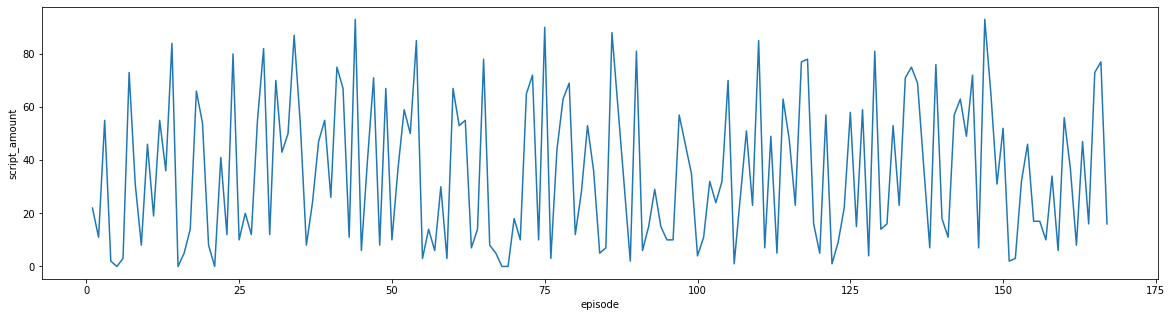

In [16]:
x = []
y = []
for key, value in stock_by_character['민정'].items():
    x.append(key)
    y.append(value)
    
    
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.xlabel('episode')
plt.ylabel('script_amount')
plt.show()

### 김 범의 대사량 변화 그래프

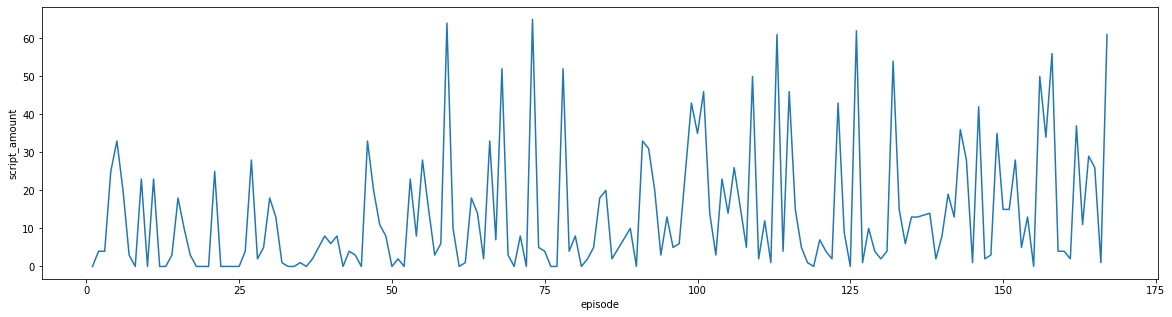

In [17]:
x = []
y = []
for key, value in stock_by_character['범'].items():
    x.append(key)
    y.append(value)
    
    
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.xlabel('episode')
plt.ylabel('script_amount')
plt.show()

### 찬성의 대사량 변화 그래프

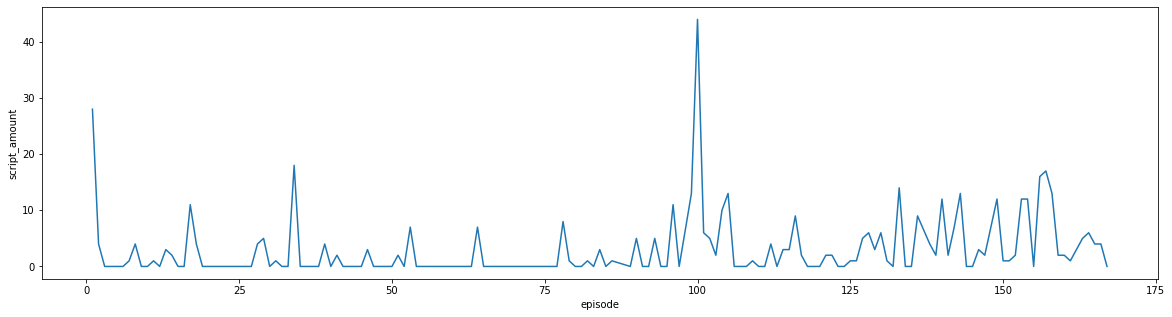

In [18]:
x = []
y = []
for key, value in stock_by_character['찬성'].items():
    x.append(key)
    y.append(value)
    
    
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.xlabel('episode')
plt.ylabel('script_amount')
plt.show()

### 유미의 대사량 변화 그래프

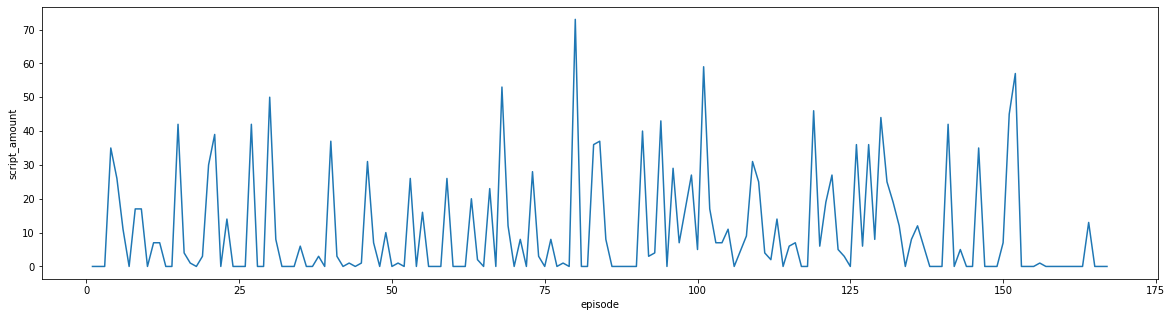

In [19]:
x = []
y = []
for key, value in stock_by_character['유미'].items():
    x.append(key)
    y.append(value)
    
    
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.xlabel('episode')
plt.ylabel('script_amount')
plt.show()